## EDA IOWA Dataset - Exploratory Data Analysis (2)

**Status:** PUBLIC Distribution <br>

**Author:** Jaume Manero IE<br>
**Date created:** 2021/02/1<br>
**Last modified:** 2023/04/12<br>
**Description:** Analysis of IOWA Dataset

This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012 til 2023
The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

In [1]:
# https://github.com/hamzafarooq/Time-Series

In [2]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
import matplotlib as mpl
import datetime
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap

In [3]:
file = 'Iowa_Liquor_Sales_2023.csv'
df = pd.read_csv(file, header=0)

In [4]:
# when does the data finishes?
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by=['Date'], ascending=True)
df.tail()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
8497564,INV-57109900004,2023-03-31,4590,CASEY'S GENERAL STORE #3045 / CEDAR FALLS,"601, MAIN ST",CEDAR FALLS,50613.0,POINT (-92.44559 42.53296),NaN,BLACK HAWK,...,19476,MAKERS MARK,12,750,18.00,27.00,12,324.00,9.00,2.37
8489978,INV-57138000014,2023-03-31,4818,DECORAH MART,"303, COLLEGE DR",DECORAH,52101.0,POINT (-91.79701 43.30764),NaN,WINNESHIEK,...,43128,BACARDI SUPERIOR,6,1750,15.50,23.25,6,139.50,10.50,2.77
8497566,INV-57150800030,2023-03-31,3514,KAREN'S SPIRITS AND WINE,328 2ND AVE S,FORT DODGE,50501.0,POINT (-94.19245 42.50233),NaN,WEBSTER,...,27369,CEDAR RIDGE PORT CASK FINISHED BOURBON,6,750,25.50,38.25,1,38.25,0.75,0.19
8497555,INV-57117800039,2023-03-31,2505,HY-VEE WINE AND SPIRITS (1038) / BOONE,1111 8TH ST,BOONE,50036.0,POINT (-93.87572 42.06382),NaN,BOONE,...,35914,FIVE O'CLOCK VODKA,24,375,1.93,2.90,3,8.70,1.12,0.29
8489940,INV-57146400012,2023-03-31,4057,TEQUILA'S LIQUOR STORE,1434 DES MOINES ST STE 5,DES MOINES,50316.0,POINT (-93.59726 41.59526),NaN,POLK,...,36482,SVEDKA 80PRF,24,375,5.00,7.50,4,30.00,1.50,0.39


In [5]:
# let's scrap 2022 as it is not complete
df = df[df['Date'].dt.year != 2022]

# Data Overview

In [6]:
df_backup = df # it is always useful to store an orignial version of the data

In [7]:
df_rows = df.shape[0]

In [8]:
# Check for % of missing values in each column - drop nulls
df.isnull().sum()/df_rows*100

Invoice/Item Number      0.000000
Date                     0.000000
Store Number             0.000000
Store Name               0.000000
Address                  0.342354
City                     0.342350
Zip Code                 0.342540
Store Location           9.659350
County Number            3.309720
County                   0.667836
Category                 0.071935
Category Name            0.106118
Vendor Number            0.000038
Vendor Name              0.000030
Item Number              0.000000
Item Description         0.000000
Pack                     0.000000
Bottle Volume (ml)       0.000000
State Bottle Cost        0.000042
State Bottle Retail      0.000042
Bottles Sold             0.000000
Sale (Dollars)           0.000042
Volume Sold (Liters)     0.000000
Volume Sold (Gallons)    0.000000
dtype: float64

In [9]:
df

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
24594260,S03401600098,2012-01-03,2522,HY-VEE WINE AND SPIRITS / SPIRIT LAK,HWY 9 & 71,SPIRIT LAKE,51360,NaN,30.0,DICKINSON,...,22784,BEAM'S 8 STAR BL WHISKEY,24,375,1.90,2.85,6,17.10,2.25,0.59
1534883,S03411600012,2012-01-03,4001,WAL-MART 1787 / CARROLL,2014 KITTY HAWK AVE,CARROLL,51401,POINT (-94.893501 42.081312),14.0,CARROLL,...,80456,RYAN'S CREAM LIQUEUR,12,750,6.69,10.04,12,120.48,9.00,2.38
25788616,S03393400089,2012-01-03,2624,HY-VEE #2 / DUBUQUE,2395 NW ARTERIAL RD,DUBUQUE,52002,POINT (-90.741064 42.516633),31.0,DUBUQUE,...,42485,MALIBU CRANBERRY CHERRY,12,750,6.90,10.35,12,124.20,9.00,2.38
24253128,S03396600136,2012-01-03,3456,QUICK SHOP / CLEAR LAKE,904 N 8TH ST,CLEAR LAKE,50428,POINT (-93.378772 43.142868),17.0,CERRO GORDO,...,75208,KINKY LIQUEUR MINI,6,500,4.67,7.00,2,14.00,1.00,0.26
3021401,S03389100007,2012-01-03,4457,KUM & GO #422 / IOWA CITY,513 S RIVERSIDE DR,IOWA CITY,52240,POINT (-91.540402 41.653301),52.0,JOHNSON,...,89196,JOSE CUERVO ESPECIAL REPOSADO TEQUILA,12,750,10.49,15.73,12,188.76,9.00,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8497564,INV-57109900004,2023-03-31,4590,CASEY'S GENERAL STORE #3045 / CEDAR FALLS,"601, MAIN ST",CEDAR FALLS,50613.0,POINT (-92.44559 42.53296),NaN,BLACK HAWK,...,19476,MAKERS MARK,12,750,18.00,27.00,12,324.00,9.00,2.37
8489978,INV-57138000014,2023-03-31,4818,DECORAH MART,"303, COLLEGE DR",DECORAH,52101.0,POINT (-91.79701 43.30764),NaN,WINNESHIEK,...,43128,BACARDI SUPERIOR,6,1750,15.50,23.25,6,139.50,10.50,2.77
8497566,INV-57150800030,2023-03-31,3514,KAREN'S SPIRITS AND WINE,328 2ND AVE S,FORT DODGE,50501.0,POINT (-94.19245 42.50233),NaN,WEBSTER,...,27369,CEDAR RIDGE PORT CASK FINISHED BOURBON,6,750,25.50,38.25,1,38.25,0.75,0.19
8497555,INV-57117800039,2023-03-31,2505,HY-VEE WINE AND SPIRITS (1038) / BOONE,1111 8TH ST,BOONE,50036.0,POINT (-93.87572 42.06382),NaN,BOONE,...,35914,FIVE O'CLOCK VODKA,24,375,1.93,2.90,3,8.70,1.12,0.29


In [10]:
df.dropna(inplace=True)
#df = df.drop('Unnamed: 0',axis=1)

In [11]:
df.isnull().sum()/df_rows*100

Invoice/Item Number      0.0
Date                     0.0
Store Number             0.0
Store Name               0.0
Address                  0.0
City                     0.0
Zip Code                 0.0
Store Location           0.0
County Number            0.0
County                   0.0
Category                 0.0
Category Name            0.0
Vendor Number            0.0
Vendor Name              0.0
Item Number              0.0
Item Description         0.0
Pack                     0.0
Bottle Volume (ml)       0.0
State Bottle Cost        0.0
State Bottle Retail      0.0
Bottles Sold             0.0
Sale (Dollars)           0.0
Volume Sold (Liters)     0.0
Volume Sold (Gallons)    0.0
dtype: float64

In [12]:
## check for data types and outliers for continuous variables
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
#df.drop('Date',axis=1)

In [14]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07,2.061580e+07
mean,3.780663e+03,5.691176e+01,1.048326e+06,2.635834e+02,1.223912e+01,8.992806e+02,1.012321e+01,1.519756e+01,1.060800e+01,1.398316e+02,9.240790e+00,2.439193e+00
std,1.067628e+03,2.746849e+01,7.512464e+04,1.406537e+02,7.707333e+00,6.549876e+02,1.072233e+01,1.608276e+01,2.970090e+01,4.962172e+02,3.561799e+01,9.409352e+00
min,2.106000e+03,1.000000e+00,1.011000e+06,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.623000e+03,3.100000e+01,1.012200e+06,1.150000e+02,6.000000e+00,7.500000e+02,5.500000e+00,8.260000e+00,3.000000e+00,3.288000e+01,1.500000e+00,4.000000e-01
50%,3.838000e+03,6.100000e+01,1.031200e+06,2.600000e+02,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.344000e+01,4.800000e+00,1.270000e+00
75%,4.619000e+03,7.700000e+01,1.062400e+06,3.840000e+02,1.200000e+01,1.000000e+03,1.249000e+01,1.874000e+01,1.200000e+01,1.440000e+02,1.050000e+01,2.770000e+00
max,9.946000e+03,9.900000e+01,1.901200e+06,9.870000e+02,3.360000e+02,3.780000e+05,7.680000e+03,1.152000e+04,1.500000e+04,2.795573e+05,1.500000e+04,3.962580e+03


In [15]:
daily_sale=df.groupby('Date')[['Sale (Dollars)']].sum().sort_values(by = ['Sale (Dollars)'], \
                                                                                ascending=False).reset_index()

daily_sale=daily_sale.sort_values('Date')
daily_sale.head(5)

,Date,Sale (Dollars)
2040,2012-01-03,920756.17
2178,2012-01-04,803626.03
2135,2012-01-05,846667.69
2116,2012-01-09,869108.01
2159,2012-01-10,819375.31


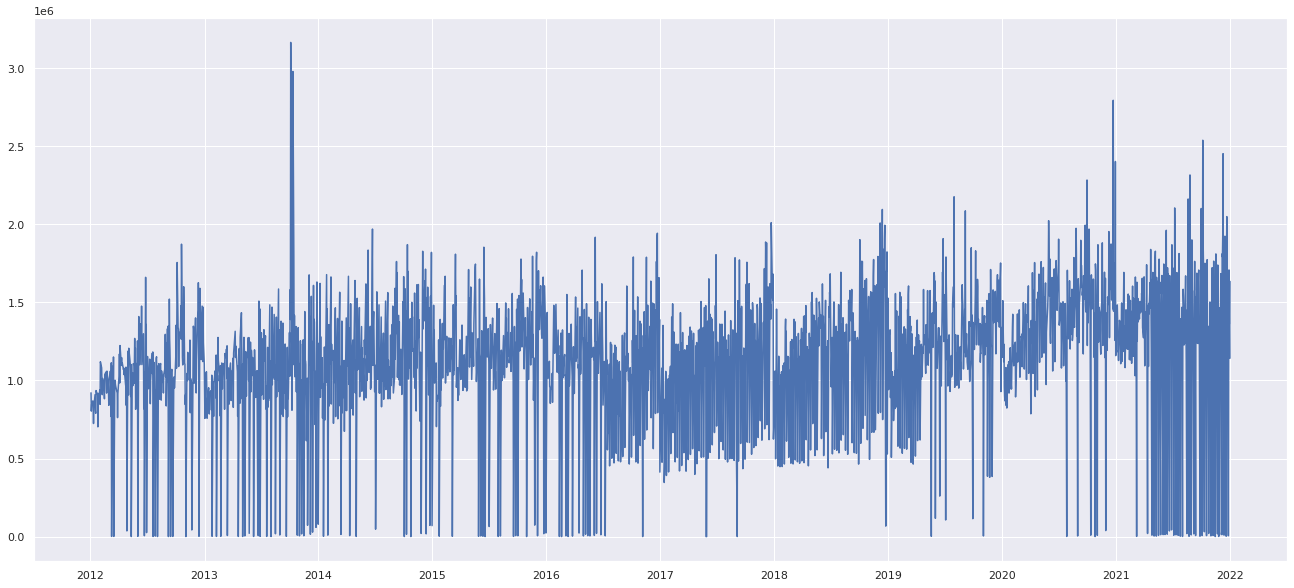

In [16]:
plt.figure(figsize=(20,10))
plt.plot(daily_sale['Date'],daily_sale['Sale (Dollars)'])
plt.show()

# Finding sales for all Wal-Mart Stores

In [17]:
df.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [18]:
df['Store Name'].unique().tolist()

['WAL-MART 1787 / CARROLL',
 'HY-VEE #2 / DUBUQUE',
 'QUICK SHOP / CLEAR LAKE',
 'KUM & GO #422 / IOWA CITY',
 'UPTOWN LIQUOR, LLC',
 "NEWMAN'S THRIFTWAY",
 'HY-VEE FOOD STORE / MUSCATINE',
 'HY-VEE FOOD AND DRUG / CLINTON',
 'WAL-MART 2889 / CLINTON',
 "MAC'S LIQUOR AND VIDEOS",
 'HY-VEE WINE AND SPIRITS / HUBBELL',
 'HY-VEE FOOD STORE #1 / COUNCIL BLUFF',
 "BREWSKI'S BEVERAGE",
 'PRONTO / SPIRIT LAKE',
 'THE BOONEDOCKS',
 'GREAT PASTIMES',
 'HY-VEE #3 / DUBUQUE',
 "SID'S BEVERAGE SHOP",
 'BARNES FOODLAND',
 "DAHL'S / JOHNSTON",
 'FAREWAY STORES #561 / WAVERLY',
 'SPIRITS / GRIMES',
 'FAREWAY STORES #909 / ANKENY',
 'HY-VEE FOOD STORE / KEOKUK',
 "DICK'S BEVERAGE DEPOT",
 'TOBACCO HUT #6 / COUNCIL',
 'HY-VEE WINE AND SPIRITS / BETTENDORF',
 'ARMSTRONG LIQUOR STORE',
 'HY-VEE FOOD STORE / JOHNSTON',
 'GRUNDY CENTER FAMILY FOODS',
 'BROTHERS MARKET, INC. / CASCADE',
 'NORTH SCOTT FOODS',
 'LIQUOR BARN, INC.',
 'ANAMOSA FAMILY FOODS',
 'BEST TRIP',
 'WAL-MART 1509 / MAQUOKETA',
 'KUM & G

In [19]:
wmt_list=[]
for i in set(df['Store Name']):
  if 'WAL-MART' in i:
    wmt_list.append(i)

len(wmt_list)

57

In [20]:
wmt_stores_only = df[df['Store Name'].isin(wmt_list)]
wmt_stores_only.head(5)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1534883,S03411600012,2012-01-03,4001,WAL-MART 1787 / CARROLL,2014 KITTY HAWK AVE,CARROLL,51401,POINT (-94.893501 42.081312),14.0,CARROLL,...,80456,RYAN'S CREAM LIQUEUR,12,750,6.69,10.04,12,120.48,9.0,2.38
25410446,S03386600007,2012-01-03,3647,WAL-MART 2889 / CLINTON,2715 SOUTH 25TH ST,CLINTON,52732,POINT (-90.245005 41.818874),23.0,CLINTON,...,41360,UV PINK LEMONADE VODKA,12,750,6.22,9.33,12,111.96,9.0,2.38
4330336,S03383700027,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,41693,UV BLUE (RASPBERRY) VODKA,12,750,6.22,9.33,24,223.92,18.0,4.76
1534198,S03383700009,2012-01-03,3934,WAL-MART 1509 / MAQUOKETA,103 E CARLISLE,MAQUOKETA,52060,POINT (-90.66292 42.04869),49.0,JACKSON,...,86112,DEKUYPER TRIPLE SEC,12,1000,2.21,3.32,12,39.84,12.0,3.17
1165930,S03408000021,2012-01-03,3622,WAL-MART 1415 / SPIRIT LAKE,2600 HWY 71,SPIRIT LAKE,51360,POINT (-95.126535 43.416452),30.0,DICKINSON,...,41846,EVERCLEAR ALCOHOL,12,750,8.02,12.03,12,144.36,9.0,2.38


In [21]:
locations=set(wmt_stores_only['Store Location'])

In [22]:
def long(q):
  l=[]
  for i in q:
    
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace('(',"")
    k=i.split()
    l.append(float(k[0]))
  return l
    



In [23]:
def lat(q):
  l=[]
  for i in q:
    i=i.replace('POINT',"")
    i=i.replace('[',"")
    i=i.replace(')',"")
    k=i.split()
    l.append(float(k[1]))
  return l

In [24]:
wmt_stores_only.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [25]:
wmt_stores_only['lat']= lat(wmt_stores_only['Store Location'].values)
wmt_stores_only['long']= long(wmt_stores_only['Store Location'].values)


In [26]:
wmt_locations=wmt_stores_only[['Store Number','lat','long']].drop_duplicates()

In [27]:
wmt_store_sales = wmt_stores_only.groupby('Store Number')[['Sale (Dollars)']].sum(). \
                                          sort_values(by = ['Sale (Dollars)'], ascending=False).reset_index()


In [28]:
wmt_locations

,Store Number,lat,long
1534883,4001,42.081312,-94.893501
25410446,3647,41.818874,-90.245005
4330336,3934,42.048690,-90.662920
1165930,3622,43.416452,-95.126535
2398987,3632,42.489041,-90.736955
...,...,...,...
14001680,4013,41.437982,-91.030690
13986697,3776,41.558031,-90.622740
14001200,3859,42.450702,-91.893361
14001175,3742,42.781021,-96.185199


In [29]:
wmt_store_sales=pd.merge(wmt_store_sales,wmt_locations , how='left', on='Store Number')

In [30]:
wmt_store_sales.head(5)

,Store Number,Sale (Dollars),lat,long
0,3644,6250095.41,41.644195,-93.505276
1,3644,6250095.41,41.644194,-93.504802
2,4209,5867673.06,41.688332,-93.771698
3,4209,5867673.06,41.685538,-93.771356
4,3562,5695400.59,40.813125,-91.158407


# Exploratory Data Analysis
### Top 5 categories of liquor by total sales

Credit: Batool Fatima
https://www.linkedin.com/in/batoolfatima1/

In [33]:
liquor_sales=wmt_stores_only

In [34]:
liquor_sales['Category Name'] = liquor_sales['Category Name'].str.lower().str.title()

In [35]:
categories = pd.DataFrame(liquor_sales[['Category Name','Sale (Dollars)']])
Top_categories = categories.groupby('Category Name')[['Sale (Dollars)']].sum().sort_values(by = ['Sale (Dollars)'], \
                                                                                ascending=False).reset_index()

In [36]:
Top_categories.shape

(89, 2)

In [37]:
Top_categories.head()

,Category Name,Sale (Dollars)
0,Canadian Whiskies,22355832.03
1,American Vodkas,16620266.67
2,Spiced Rum,16210428.92
3,Vodka 80 Proof,11700980.30
4,Straight Bourbon Whiskies,10332991.73


In [38]:
categories_sales = Top_categories.head(10)
categories_sales

,Category Name,Sale (Dollars)
0,Canadian Whiskies,22355832.03
1,American Vodkas,16620266.67
2,Spiced Rum,16210428.92
3,Vodka 80 Proof,11700980.30
4,Straight Bourbon Whiskies,10332991.73
5,Tennessee Whiskies,9886469.25
6,Whiskey Liqueur,6957089.91
7,Cream Liqueurs,6800042.22
8,Blended Whiskies,5998631.22
9,Flavored Rum,5549707.35



### Top Selling 10 categories

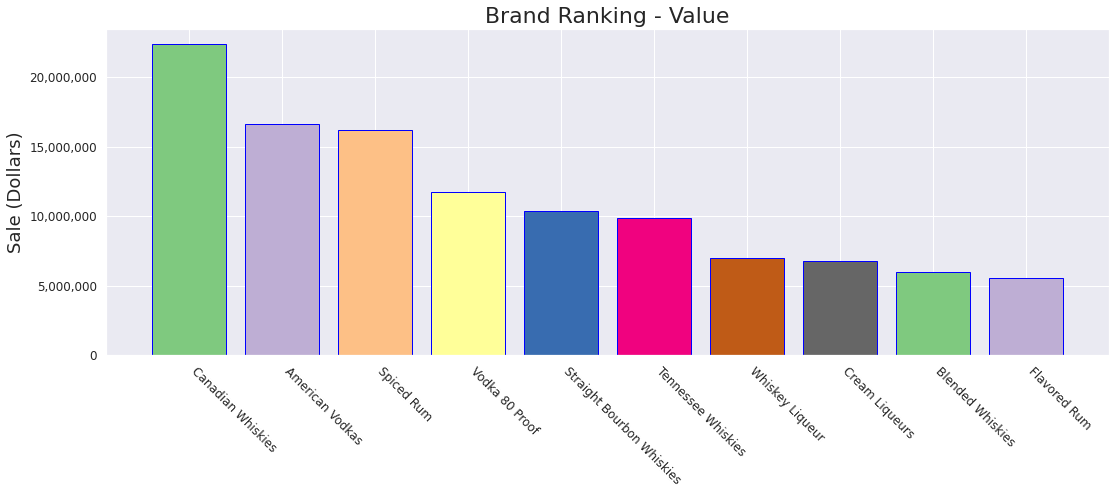

In [39]:
df_rank = categories_sales
fig, ax = plt.subplots(figsize=(16, 6))
#sns.set(style = 'white')
name = "Accent"
cmap = plt.get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.title('Brand Ranking - Value', size=22)
ax.bar(df_rank['Category Name'], df_rank['Sale (Dollars)'], color=colors, edgecolor='blue')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Sale (Dollars)', size=18)
plt.xticks(fontsize=12, rotation=-45, ha='left')
plt.yticks(fontsize=12)
plt.show()

### Daily Sales

In [40]:
liguor_sales = df.copy()

In [41]:
liquor_sales['year'] = pd.DatetimeIndex(liquor_sales['Date']).year
liquor_sales['month'] = pd.DatetimeIndex(liquor_sales['Date']).month
liquor_sales['day'] = pd.DatetimeIndex(liquor_sales['Date']).day_name()

In [42]:
daily_sales = liquor_sales.groupby('day')[['Sale (Dollars)']].sum().sort_values(by = ['day']).reset_index()
#daily_sales

In [43]:
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

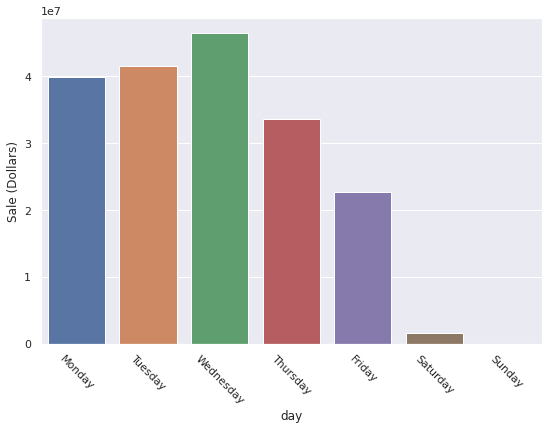

In [44]:
# bar chart for total sales for each category
plt.figure(figsize=(8,6))
sns.barplot(x= 'day', y = 'Sale (Dollars)', data=daily_sales, order = daysofweek)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Yearly trend of liquor categories

In [45]:
yearly_data = pd.DataFrame(liquor_sales[liquor_sales['Category Name'].isin(['Canadian Whiskies', 'American Vodkas', \
                                                                            'Spiced Rum','Straight Bourbon Whiskies', \
                                                                            'Tennessee Whiskies'])])

x = yearly_data.groupby(['year', 'Category Name'])['Sale (Dollars)'].sum().reset_index()


In [46]:
x

,year,Category Name,Sale (Dollars)
0,2012,Canadian Whiskies,1774802.21
1,2012,Spiced Rum,1806886.84
2,2012,Straight Bourbon Whiskies,569654.95
3,2012,Tennessee Whiskies,762314.94
4,2013,Canadian Whiskies,2100548.52
5,2013,Spiced Rum,1975660.14
6,2013,Straight Bourbon Whiskies,770925.70
7,2013,Tennessee Whiskies,985019.82
8,2014,Canadian Whiskies,2187358.96
9,2014,Spiced Rum,1626145.43


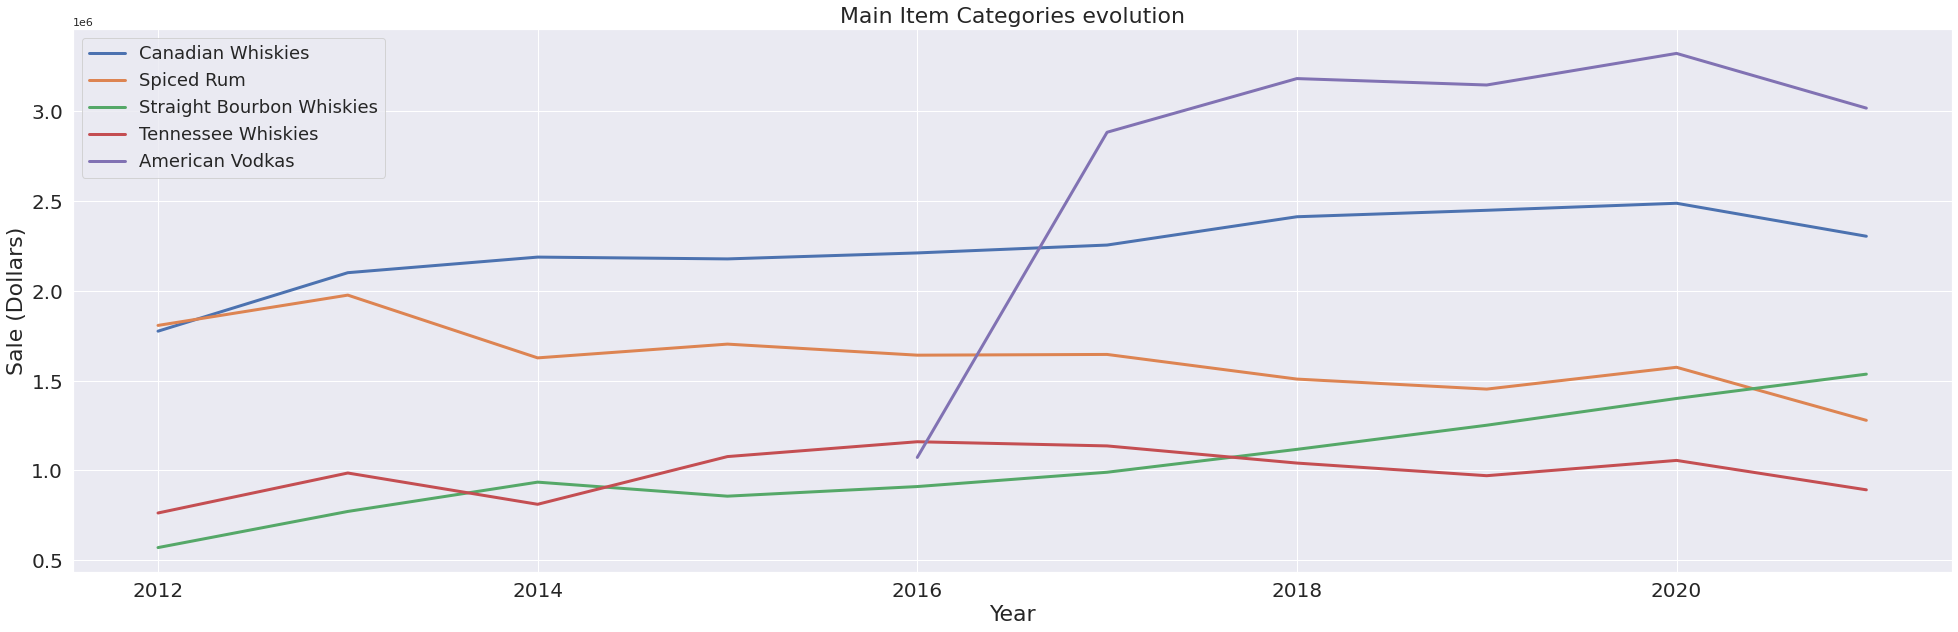

In [47]:
# Line Plot
cats = x['Category Name'].unique().tolist()

fig, ax = plt.subplots(figsize=(30,10))
for c in cats:
   cat_to_plot = x[x['Category Name']== c]
   ax.plot(cat_to_plot['year'],cat_to_plot['Sale (Dollars)'],linewidth=3.0,label=c)
plt.title('Main Item Categories evolution', size=22)
plt.ylabel('Sale (Dollars)', size=22)
plt.xlabel("Year", size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="upper left",fontsize = 18)
#plt.savefig("figure_image.jpg")
plt.show()

## Drill deeper into the top selling categories - Canadian Whiskey

In [48]:
Can_whiskies_items = liquor_sales[liquor_sales['Category Name'] == 'Canadian Whiskies']

In [49]:
Can_whiskies_items['Item Description'] = Can_whiskies_items['Item Description'].str.lower().str.title()

In [50]:
Can_whiskies_items.groupby(['Item Description'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Bottles Sold', 'Sale (Dollars)'], ascending = False).reset_index().head(5)

,Item Description,Bottles Sold,Sale (Dollars)
0,Black Velvet,660895,8630711.91
1,Crown Royal,141247,3517889.71
2,Crown Royal Regal Apple,90930,2296089.41
3,Canadian Ltd Whisky,84291,1073787.35
4,Windsor Canadian Pet,62401,867438.84


In [51]:
Top_Whisky_items = pd.DataFrame(Can_whiskies_items[Can_whiskies_items['Item Description'].isin\
                                      (['Black Velvet', 'Crown Royal', 'Black Velvet Toasted Caramel',\
                                      'Canadian Ltd Whisky','Crown Royal Regal Apple'])])

Top_Whisky_items1 = Top_Whisky_items.groupby(['Item Description', 'year'])[['Bottles Sold', 'Sale (Dollars)']]\
.sum().sort_values(by = ['Item Description', 'year', 'Bottles Sold']).reset_index()
#Top_Whisky_items

In [52]:
Top_Whisky_items1.columns

Index(['Item Description', 'year', 'Bottles Sold', 'Sale (Dollars)'], dtype='object')

Canadian Ltd Whisky
Black Velvet
Crown Royal
Black Velvet Toasted Caramel
Crown Royal Regal Apple


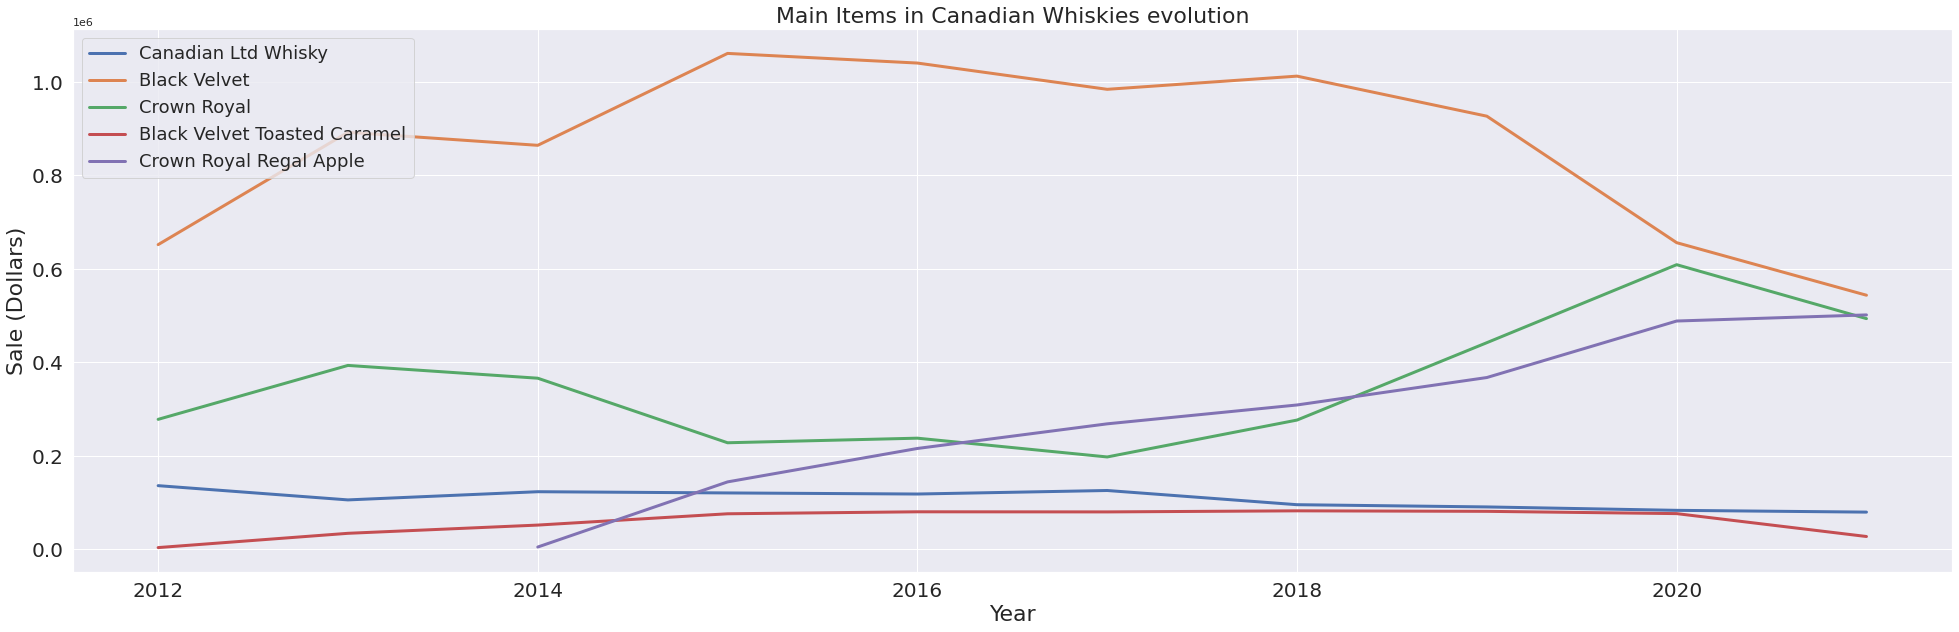

In [53]:
# Line Plot
x = Top_Whisky_items1
cats = Top_Whisky_items['Item Description'].unique().tolist()
for c in cats:
   print(c)

fig, ax = plt.subplots(figsize=(30,10))
for c in cats:
   cat_to_plot = x[x['Item Description']== c]
   ax.plot(cat_to_plot['year'],cat_to_plot['Sale (Dollars)'],linewidth=3.0,label=c)
plt.title('Main Items in Canadian Whiskies evolution', size=22)
plt.ylabel('Sale (Dollars)', size=22)
plt.xlabel("Year", size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="upper left",fontsize = 18)
#plt.savefig("figure_image.jpg")
plt.show()

## bottles_sold for Top 5 Canadian Whisky Items

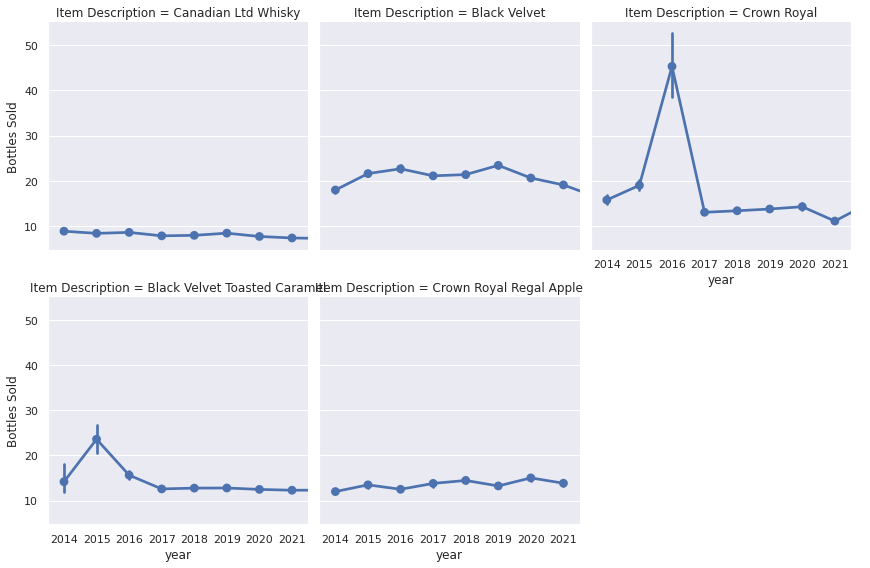

In [54]:
g = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
g.map(sns.pointplot, "year", "Bottles Sold", alpha=.1)
g.add_legend();

## Sales for Top 5 Canadian Whisky Items

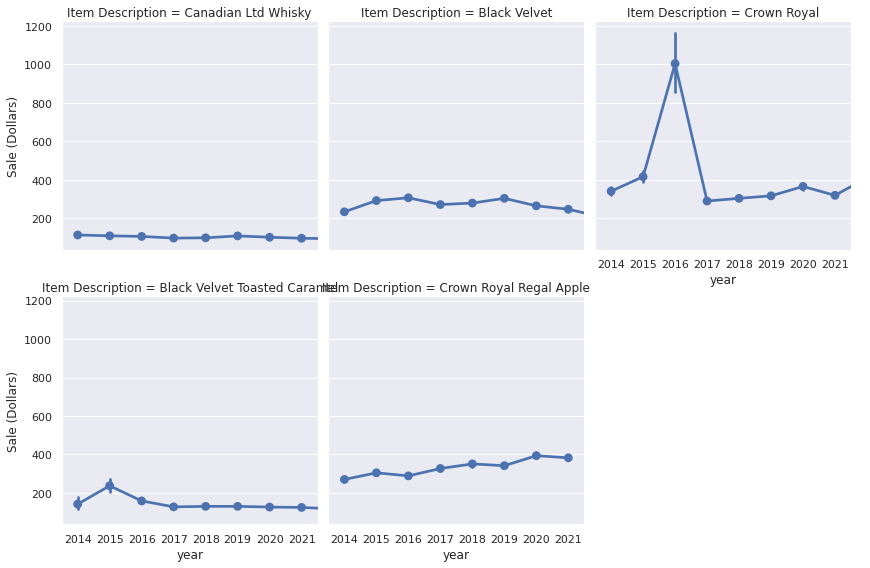

In [55]:
b = sns.FacetGrid(Top_Whisky_items, col="Item Description", col_wrap = 3, height=4)
b.map(sns.pointplot, "year", "Sale (Dollars)", alpha=.1)
b.add_legend();

### Evolution Sales Item Categories

In [56]:
items = df.copy()

In [57]:
item_list = items['Category Name'].unique().tolist()
items['year'] = pd.DatetimeIndex(items['Date']).year
cat_totals = items.groupby(['year', 'Category Name'])['Sale (Dollars)'].sum().reset_index()
cat_global = items.groupby(['Category Name'])['Sale (Dollars)'].sum().reset_index()
cat_global = cat_global.sort_values(by='Sale (Dollars)',ascending=False)
item_list = cat_global['Category Name'].unique().tolist()

In [58]:
cat_global

,Category Name,Sale (Dollars)
28,CANADIAN WHISKIES,3.471918e+08
18,AMERICAN VODKAS,2.515357e+08
94,SPICED RUM,1.985001e+08
95,STRAIGHT BOURBON WHISKIES,1.810142e+08
108,WHISKEY LIQUEUR,1.445750e+08
...,...,...
49,HOLIDAY VAP,3.217120e+03
62,IMPORTED VODKA - CHERRY,2.348760e+03
98,TEMPORARY & SPECIALTY PACKAGES,1.953390e+03
19,AMERICAN WHISKIES,1.881000e+03


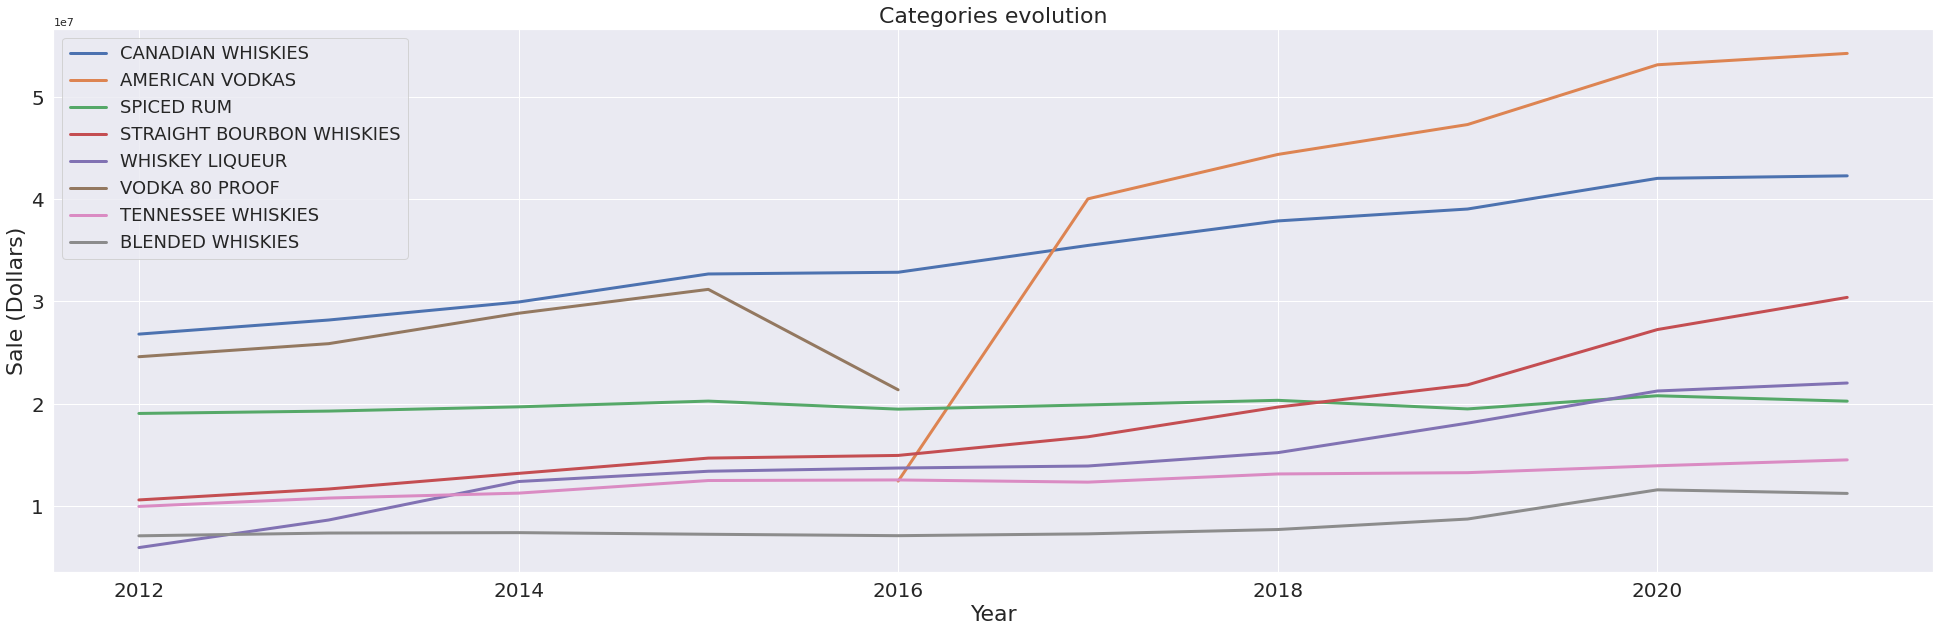

In [59]:
item_list = item_list[0:8]

# Line Plot
x = cat_totals

fig, ax = plt.subplots(figsize=(30,10))
for c in item_list:
   cat_to_plot = x[x['Category Name']== c]
   ax.plot(cat_to_plot['year'],cat_to_plot['Sale (Dollars)'],linewidth=3.0,label=c)
plt.title('Categories evolution', size=22)
plt.ylabel('Sale (Dollars)', size=22)
plt.xlabel("Year", size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc="upper left",fontsize = 18)
#plt.savefig("figure_image.jpg")
plt.show()

In [60]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.5.0
mpl_toolkits        NA
numpy               1.22.4
pandas              1.5.3
seaborn             0.11.2
session_info        1.0.0
statsmodels         0.13.5
-----
IPython             7.29.0
jupyter_client      8.2.0
jupyter_core        5.3.0
notebook            6.5.4
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.15.0-69-generic-x86_64-with-glibc2.17
-----
Session information updated at 2023-04-17 17:58
